In [357]:
# from waldo_stripes import *
import cv2
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
import itertools as itertools 
import time

Populating the interactive namespace from numpy and matplotlib


d:\1920sem1\cs4243\project_wx_tryout\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['hsv']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [358]:
import os
image_dir = "D:\\1920Sem1\CS4243\project\CS4243-Project\datasets\JPEGImages"
images = [os.path.join(image_dir, img) for img in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, img))]

In [359]:
img_1 = cv2.imread(images[0])
wanda_img = img_1[4935:5139, 734:856]
waldo_img = img_1[3981:4257, 9564:9748]

In [360]:
img_0 = np.rot90(np.rot90(img_1)[9921-856:9921-734, :],3)

In [326]:
hsv = cv2.cvtColor(img_0, cv2.COLOR_RGB2HSV)

lower_red = np.array([110,80,80])
upper_red = np.array([160,255,255])
mask_red_only = cv2.inRange(hsv, lower_red, upper_red)

lower_white = np.array([0,0,255])
upper_white = np.array([255,255,255])
mask_white_only = cv2.inRange(hsv, lower_white, upper_white)

In [327]:
print(img_0.shape)

(7015, 122, 3)


In [328]:
red_mask_rot = np.rot90(mask_red_only)
white_mask_rot = np.rot90(mask_white_only)
img_rot = np.rot90(hsv)

In [329]:
# red_mask_rot = red_mask_rot[9921-856:9921-734  ,4935:5139]
# white_mask_rot = white_mask_rot[9921-856:9921-734  ,4935:5139]

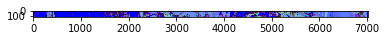

In [330]:
plt.imshow(img_rot)
plt.show()

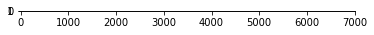

[0 0]


In [331]:
plt.imshow(red_mask_rot[50:52, :])
plt.show()
print(red_mask_rot[50:52, 561])

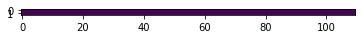

[[  0   0 255]
 [  0   0 255]]


In [332]:
plt.imshow(white_mask_rot[50:52, 560:670])
plt.show()
print(img_rot[50:52, 580])

In [333]:
# attach a column of row number to the masks
index_array = np.flip(np.arange(mask_red_only.shape[1]))
print(index_array)
print(mask_red_only.shape)
stacked_red = np.vstack((index_array, mask_red_only))
stacked_red_white = np.vstack((stacked_red, mask_white_only))

red_mask_rot = np.rot90(stacked_red)
red_white_mask_rot = np.rot90(stacked_red_white)

print(red_white_mask_rot.shape)
print(red_white_mask_rot[:, 0])

[121 120 119 118 117 116 115 114 113 112 111 110 109 108 107 106 105 104
 103 102 101 100  99  98  97  96  95  94  93  92  91  90  89  88  87  86
  85  84  83  82  81  80  79  78  77  76  75  74  73  72  71  70  69  68
  67  66  65  64  63  62  61  60  59  58  57  56  55  54  53  52  51  50
  49  48  47  46  45  44  43  42  41  40  39  38  37  36  35  34  33  32
  31  30  29  28  27  26  25  24  23  22  21  20  19  18  17  16  15  14
  13  12  11  10   9   8   7   6   5   4   3   2   1   0]
(7015, 122)
(122, 14031)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 

In [361]:
def preprocess_input_img(img_0):
    hsv = cv2.cvtColor(img_0, cv2.COLOR_RGB2HSV)

    lower_red = np.array([110,80,80])
    upper_red = np.array([160,255,255])
    mask_red_only = cv2.inRange(hsv, lower_red, upper_red)

    lower_white = np.array([0,0,255])
    upper_white = np.array([255,255,255])
    mask_white_only = cv2.inRange(hsv, lower_white, upper_white)
    
    # attach a column of row number to the masks
    index_array = np.flip(np.arange(mask_red_only.shape[1]))

    stacked_red = np.vstack((index_array, mask_red_only))
    stacked_red_white = np.vstack((stacked_red, mask_white_only))

    red_mask_rot = np.rot90(stacked_red)
    red_white_mask_rot = np.rot90(stacked_red_white)
    
    return red_white_mask_rot

In [362]:
red_white_mask_rot = preprocess_input_img(img_0)

In [363]:
col_no = 9921-856 + 50
col_no = 50

In [364]:
# print(red_mask_rot.shape)
# print(white_mask_rot.shape)
# print(mask_white_only.shape)
print(red_white_mask_rot.shape)

(122, 14031)


In [367]:
print(get_suspected_waldo_stripe_region_for_col(red_white_mask_rot[col_no]))

[[ 1.00000000e+00  5.00000000e+01  5.06000000e+03  5.16000000e+03
   7.00000000e+00  1.42857143e+01]
 [ 0.00000000e+00  5.00000000e+01 -1.00000000e+00 -1.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  5.00000000e+01 -1.00000000e+00 -1.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  5.00000000e+01 -1.00000000e+00 -1.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  5.00000000e+01 -1.00000000e+00 -1.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  5.00000000e+01 -1.00000000e+00 -1.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  5.00000000e+01 -1.00000000e+00 -1.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  5.00000000e+01 -1.00000000e+00 -1.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  5.00000000e+01 -1.00000000e+00 -1.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  5.00000000e+01 -1.00000000e+00 -1.00000000e+00
   0.00000000e+00  0.0000

In [365]:
def get_suspected_waldo_stripe_region_for_col(red_white_mask_col, ratio_range=(1/2, 2), white_pixel_threshold=0.3):
    col_index = red_white_mask_col[0]
    red_mask_col = red_white_mask_col[1:int((len(red_white_mask_col)-1)/2+1)]
    white_mask_col = red_white_mask_col[int((len(red_white_mask_col)-1)/2+1):]
    assert red_mask_col.shape == white_mask_col.shape, "the mask column inputs for white and red masks are of different shapes:" + str(red_mask_col.shape) + "; " + str(white_mask_col.shape)
    
    
    white_mask_col = white_mask_col[1:]
    
    new_red_mask_col = np.zeros(len(red_mask_col))
    new_red_mask_col[red_mask_col == 255] = 1
    new_red_mask_col[red_mask_col == 0] = -1
    
    new_white_mask_col = np.zeros(len(white_mask_col))
    new_white_mask_col[white_mask_col == 255] = 1
    new_white_mask_col[white_mask_col == 0] = 0
#     print(new_white_mask_col)
#     print(new_red_mask_col)
    streak_array = get_streak_len_array_with_approx(new_red_mask_col, 0)
    ratio_array = np.array([abs(streak_array[i]) / abs(streak_array[i + 1]) for i in range(len(streak_array) - 1)])
    accepted_ratio_indice, = np.where(np.logical_and(ratio_array > ratio_range[0], ratio_array < ratio_range[1]))
    is_accepted_ratio_indice_continuous, lst_of_start_and_end = is_indice_continuous(accepted_ratio_indice)
#     print(streak_array[17:27])
#     print(ratio_array)
#     print(accepted_ratio_indice)
#     print(is_accepted_ratio_indice_continuous)
#     print(lst_of_start_and_end)
    revised_lst_of_start_and_end = []
#     print(is_accepted_ratio_indice_continuous)
#     print(lst_of_start_and_end)
    if is_accepted_ratio_indice_continuous:
        # then check if the negative pixels are white pixels
        for start, end in lst_of_start_and_end:
            is_region_start_with_red = streak_array[start+2] > 0
            offset = 0
            if is_region_start_with_red:
                offset = 1
            
            total_number_of_white_pixels = 0
            total_number_of_non_red_pixels = 0
#             region = [np.sum(np.abs(streak_array[:accepted_ratio_indice[start]])), np.sum(np.abs(streak_array[:accepted_ratio_indice[end-1]+1]))]
#             print("start, end: " + str(region[0]) + ", " + str(region[1]))

            while start + offset < end:
                supposedly_white_pixel_region = [np.sum(np.abs(streak_array[:accepted_ratio_indice[start + offset]])), np.sum(np.abs(streak_array[:accepted_ratio_indice[start + offset]+1]))]
#                 print(supposedly_white_pixel_region)
#                 print(np.abs(streak_array[:accepted_ratio_indice[start + offset]+1]))
#                 print(start+offset, start+offset+1)
#                 print(new_white_mask_col[int(supposedly_white_pixel_region[0]) : int(supposedly_white_pixel_region[1])])
                number_of_white_pixels = np.sum(new_white_mask_col[int(supposedly_white_pixel_region[0]) : int(supposedly_white_pixel_region[1])])
                number_of_non_red_pixels = supposedly_white_pixel_region[1] - supposedly_white_pixel_region[0]
#                 print(number_of_white_pixels)
                total_number_of_white_pixels += number_of_white_pixels
                total_number_of_non_red_pixels += number_of_non_red_pixels
                offset += 2
#             print(total_number_of_white_pixels)
#             print(total_number_of_non_red_pixels)
            if total_number_of_white_pixels / total_number_of_non_red_pixels > white_pixel_threshold:
                revised_lst_of_start_and_end.append((start, end))
        
        if len(revised_lst_of_start_and_end) == 0:
            empty_terms = np.array(list(itertools.repeat([int(False), col_index, -1, -1, 0, 0], 20)))
            return empty_terms
        stripe_region = [[int(True), \
                          col_index, \
                          np.sum(np.abs(streak_array[:accepted_ratio_indice[start]])), \
                          np.sum(np.abs(streak_array[:accepted_ratio_indice[end-1]+1])), \
                          int(end - start), \
                          (np.sum(np.abs(streak_array[:accepted_ratio_indice[end-1]+1])) - np.sum(np.abs(streak_array[:accepted_ratio_indice[start]]))) / int(end - start)] \
                         for start, end in revised_lst_of_start_and_end]
        # from here examine the percentage of white pixels in the region
        # if there are white pixels dominating the negative pixels, then it is stripes
        # return (1, col_number, start_of_stripe_region, end_of_stripe_region, number_of_stripes, average_width_of_stripes)
        
        how_many_more_terms = 20 - len(stripe_region)
        additional_terms = np.array(list(itertools.repeat([int(False), col_index, -1, -1, 0, 0], how_many_more_terms)))
#         print(np.vstack((stripe_region, additional_terms)))
        return np.vstack((stripe_region, additional_terms))
    
#     print([[int(False), col_index, -1, -1, 0, 0]])
    empty_terms = np.array(list(itertools.repeat([int(False), col_index, -1, -1, 0, 0], 20)))
    return empty_terms

In [366]:
def get_streak_len_array_with_approx(unit_lst, threshold):
    # in the unit_lst, 1 represents the superior pixel value, -1 is the inferior pixel value
    # the superior pixel value is the one that is well captured in color distillation 
    # in our case e.g. red is the superior pixel value because it is well captured 
    # and white is the inferior pixel value because it might be noise
    # we want to restore the shape outlined by the superior pixel value
    # hence we need to minimize the disturbannce by the inferior pixel value
    # hence we need to remove the 'sparse' inferior pixel value located within the streaks of superior pixel values
    # the definition of sparse is given by the threshold
    previous = 0
    streak_len_array = []
    streak_len = 0
    fast_forward_count = 0
    for i in range(len(unit_lst)):
        if i == 0:
            previous = unit_lst[i]
            
        if fast_forward_count > 0:
            fast_forward_count -= 1
            if i == len(unit_lst) - 1:
                streak_len_array.append(streak_len)
            continue
        
        if previous == unit_lst[i]:
            cur_streak_len = streak_len
            streak_len += unit_lst[i]
            if i == len(unit_lst) - 1:
                streak_len_array.append(streak_len)
            previous = unit_lst[i]
        else:
            if streak_len > 0:
                # superior pixel streak ending
                cur_streak_len = streak_len
                # we need to look ahead the threshold number of pixels to see if theres any superior pixel
                next_few_number = min(threshold, len(unit_lst) - 1 - i)
                next_few_pixels = unit_lst[i : i+1+next_few_number]
                # if there is we will continue the superior pixel streak from there
                indice_of_next_superior_pixel, = np.where(next_few_pixels == 1)
                if len(indice_of_next_superior_pixel) != 0:
                    next_superior = max(indice_of_next_superior_pixel)
                    streak_len += 1 + next_superior
                    fast_forward_count = next_superior
                    previous = abs(unit_lst[i])
                # if not we end the superior pixel streak here and start a new inferior pixel streak
                else:
                    streak_len_array.append(cur_streak_len)
                    streak_len = 0
                    streak_len += unit_lst[i]
                    previous = unit_lst[i]
            elif streak_len < 0:
                # inferior pixel streak ending
                # we will start a new superior pixel streak
                streak_len_array.append(streak_len)
                streak_len = 0
                streak_len += unit_lst[i]
                previous = unit_lst[i]
            
    return streak_len_array

def get_streak_len_array(unit_lst):
    previous = 0
    streak_len_array = []
    streak_len = 0
    for i in range(len(unit_lst)):
        if i == 0:
            previous = unit_lst[i]
        
        if previous == unit_lst[i]:
            streak_len += unit_lst[i]
            if i == len(unit_lst) - 1:
                streak_len_array.append(streak_len)
        else:
            streak_len_array.append(streak_len)
            streak_len = 0
            
        previous = unit_lst[i]
        
    return streak_len_array


# Method: Given a 1D array, find the starting position and the ending position of an arithmatic sequence with the next equal to 1+previous. The sequence must contain no less than 3 numbers.
# Input: a 1D array of integers
# Output: a tuple in the form of (Boolean, list). The boolean is True when there is at least one sequence. The list consists of tuples (starting_position_of_sequence_inclusive, ending_position_of_sequence_exclusive)
def is_indice_continuous(lst_of_indice):
    # right now the number of stripes accepted is 3
    is_continuous = False
    continuous_count = 0
    prev = -1
    start_index = -1
    lst_of_start_and_end = []
    for i in range(len(lst_of_indice)):
        if i == 0:
            prev = lst_of_indice[i]
            start_index = i
            continuous_count = 1
            continue
            
        if lst_of_indice[i] - prev == 1:
            # the streak continues
            continuous_count += 1
        else:
            # the streak ends
            if continuous_count >= 3:
                lst_of_start_and_end.append((start_index, i))
                is_continuous = True

            continuous_count = 1
            start_index = i
            
        if i == len(lst_of_indice) - 1:
            if start_index != -1 and continuous_count >= 3:
                lst_of_start_and_end.append((start_index, i))
                is_continuous = True
        
        prev = lst_of_indice[i]
        
    return (is_continuous, lst_of_start_and_end)


In [368]:
start_time = time.time()
result  = np.apply_along_axis(get_suspected_waldo_stripe_region_for_col, 1, red_white_mask_rot)
stop_time = time.time()
print("--- %s seconds ---" % (stop_time - start_time))

--- 0.9809951782226562 seconds ---


In [369]:
print(result.shape)

(122, 20, 6)


In [370]:
print(result[52])

[[   1   52 5051 5161    8   13]
 [   0   52   -1   -1    0    0]
 [   0   52   -1   -1    0    0]
 [   0   52   -1   -1    0    0]
 [   0   52   -1   -1    0    0]
 [   0   52   -1   -1    0    0]
 [   0   52   -1   -1    0    0]
 [   0   52   -1   -1    0    0]
 [   0   52   -1   -1    0    0]
 [   0   52   -1   -1    0    0]
 [   0   52   -1   -1    0    0]
 [   0   52   -1   -1    0    0]
 [   0   52   -1   -1    0    0]
 [   0   52   -1   -1    0    0]
 [   0   52   -1   -1    0    0]
 [   0   52   -1   -1    0    0]
 [   0   52   -1   -1    0    0]
 [   0   52   -1   -1    0    0]
 [   0   52   -1   -1    0    0]
 [   0   52   -1   -1    0    0]]


In [371]:
reshaped = np.reshape(result, (result.shape[0] * result.shape[1], result.shape[2]))
print(reshaped)

[[  0   0  -1  -1   0   0]
 [  0   0  -1  -1   0   0]
 [  0   0  -1  -1   0   0]
 ...
 [  0 121  -1  -1   0   0]
 [  0 121  -1  -1   0   0]
 [  0 121  -1  -1   0   0]]


In [372]:
import pandas as pd

In [373]:
df = pd.DataFrame(data=reshaped, columns=["has_stripes", "col_no", "stripe_start", "stripe_end", "no_of_stripes", "average_stripe_width"])

In [374]:
df

,has_stripes,col_no,stripe_start,stripe_end,no_of_stripes,average_stripe_width
0,0,0,-1,-1,0,0
1,0,0,-1,-1,0,0
2,0,0,-1,-1,0,0
3,0,0,-1,-1,0,0
4,0,0,-1,-1,0,0
...,...,...,...,...,...,...
2435,0,121,-1,-1,0,0
2436,0,121,-1,-1,0,0
2437,0,121,-1,-1,0,0
2438,0,121,-1,-1,0,0


In [375]:
df = df[df["has_stripes"]==1]
df

,has_stripes,col_no,stripe_start,stripe_end,no_of_stripes,average_stripe_width
300,1,15,3961,3968,3,2
960,1,48,5060,5159,7,14
1000,1,50,5060,5160,7,14
1040,1,52,5051,5161,8,13
1200,1,60,5067,5142,6,12
1220,1,61,5068,5142,6,12
1240,1,62,5068,5143,6,12
1720,1,86,5075,5114,3,13


In [355]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [356]:
print_full(df)

      has_stripes  col_no  stripe_start  stripe_end  no_of_stripes  \
300             1      15          3961        3968              3   
960             1      48          5060        5159              7   
1000            1      50          5060        5160              7   
1040            1      52          5051        5161              8   
1200            1      60          5067        5142              6   
1220            1      61          5068        5142              6   
1240            1      62          5068        5143              6   
1720            1      86          5075        5114              3   

      average_stripe_width  
300                      2  
960                     14  
1000                    14  
1040                    13  
1200                    12  
1220                    12  
1240                    12  
1720                    13  


In [105]:
streak_array = np.array([-584.0, 41.0, -71.0, 8.0, -21.0, 3.0, -44.0, 33.0, -70.0, 1.0, -67.0, 3.0, -56.0, 4.0, -6.0, 3.0, -31.0, 1.0, -20.0, 5.0, -4.0, 10.0, -4.0, 15.0, -7.0, 2.0, -2.0, 18.0, -1.0, 2.0, -9.0, 3.0, -3.0, 3.0, -5.0, 50.0, -98.0, 2.0, -5.0, 24.0, -210.0, 1.0, -32.0, 1.0, -252.0, 1.0, -3.0, 8.0, -6.0, 6.0, -170.0, 1.0, -74.0, 1.0, -11.0, 5.0, -8.0, 1.0, -20.0, 1.0, -165.0, 4.0, -3.0, 3.0, -3.0, 1.0, -14.0, 1.0, -209.0, 2.0, -39.0, 1.0, -2.0, 43.0, -2.0, 77.0, -2.0, 23.0, -225.0, 37.0, -7.0, 23.0, -1.0, 3.0, -12.0, 13.0, -2.0, 1.0, -308.0, 4.0, -288.0, 2.0, -23.0, 3.0, -33.0, 1.0, -151.0, 5.0, -54.0, 4.0, -20.0, 5.0, -754.0, 3.0, -41.0, 6.0, -8.0, 2.0, -38.0, 3.0, -309.0, 28.0, -327.0, 13.0, -63.0, 37.0, -102.0, 38.0, -136.0, 1.0, -181.0, 3.0, -95.0, 2.0, -77.0, 4.0, -51.0, 4.0, -72.0, 5.0, -60.0, 1.0, -1.0, 5.0, -207.0, 4.0, -319.0, 3.0, -42.0])

In [108]:
print(np.sum(np.abs(streak_array[:100])))

3945.0


In [112]:
for i in range(len(streak_array)):
    print(np.sum(np.abs(streak_array[:i+1])))

584.0
625.0
696.0
704.0
725.0
728.0
772.0
805.0
875.0
876.0
943.0
946.0
1002.0
1006.0
1012.0
1015.0
1046.0
1047.0
1067.0
1072.0
1076.0
1086.0
1090.0
1105.0
1112.0
1114.0
1116.0
1134.0
1135.0
1137.0
1146.0
1149.0
1152.0
1155.0
1160.0
1210.0
1308.0
1310.0
1315.0
1339.0
1549.0
1550.0
1582.0
1583.0
1835.0
1836.0
1839.0
1847.0
1853.0
1859.0
2029.0
2030.0
2104.0
2105.0
2116.0
2121.0
2129.0
2130.0
2150.0
2151.0
2316.0
2320.0
2323.0
2326.0
2329.0
2330.0
2344.0
2345.0
2554.0
2556.0
2595.0
2596.0
2598.0
2641.0
2643.0
2720.0
2722.0
2745.0
2970.0
3007.0
3014.0
3037.0
3038.0
3041.0
3053.0
3066.0
3068.0
3069.0
3377.0
3381.0
3669.0
3671.0
3694.0
3697.0
3730.0
3731.0
3882.0
3887.0
3941.0
3945.0
3965.0
3970.0
4724.0
4727.0
4768.0
4774.0
4782.0
4784.0
4822.0
4825.0
5134.0
5162.0
5489.0
5502.0
5565.0
5602.0
5704.0
5742.0
5878.0
5879.0
6060.0
6063.0
6158.0
6160.0
6237.0
6241.0
6292.0
6296.0
6368.0
6373.0
6433.0
6434.0
6435.0
6440.0
6647.0
6651.0
6970.0
6973.0
7015.0
